# Chapter 4 - Vector Applications

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format

plt.rcParams.update({'font.size':14}) # set global fonts

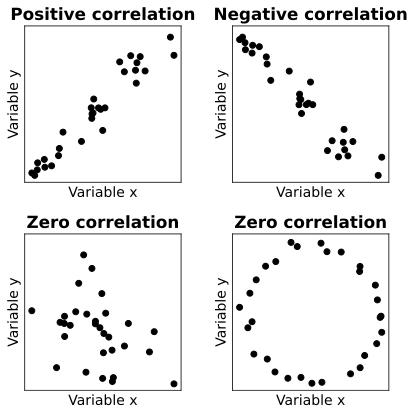

In [4]:
N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)

# set up figure
_,axs = plt.subplots(2,2,figsize=(6,6))

# positive correlation
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation', fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')

# negative correlation
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation', fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')

# zero correlation, part 1
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')

# zero correlation, part 2
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')

plt.tight_layout()
plt.savefig('Figure_04_01.png',dpi=300)
plt.show()

# k-means

In [6]:
# STEP 1. Initialize k
k = 3

#Initialize random cluster centroids by random selecting k data samples
ridx = np.random.choice(range(len(data),k,replace=False))

#
centroids = data[ridx,:] # data matrix is samples by features

# STEP 2: calculate the distance between each data observation
# and each cluster centroid
dists = np.zeros((data.shape[0],k))
for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2, axis=1)

#3: Assign each data observation to the group with min. distance
groupodx = np.argmin(dists, axis=1)

#4: Recompute the centroids as the mean of all data points within
# the class. Loop over the k clusters:
for ki in range(k):
    centroids[ki,:] = [np.mean(data[groupidx==ki,0]),
                      np.mean(data[groupidx==ki,1]),]

NameError: name 'data' is not defined

# Coding Exercise

# Exercise 1

Write a Python function that takes two vectors as input and provides two numbers as output: the Pearson correlation coefficient and the cosine similarity value. Write code that follows the formulas presented in this chapter; don’t simply call `np.corrcoef` and `spatial.distance.cosine`. Check that the two output values are identical when the variables are already mean centered and different when the variables are not mean centered.

In [85]:
# the function
def corrAndCosine(x,y):

  # compute cosine similarity
  num = np.dot(x,y) # numerator
  den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
  cos = num / den

  # compute correlation (similar to above but mean-centered!)
  xm  = x-np.mean(x)
  ym  = y-np.mean(y)
  num = np.dot(xm,ym) # numerator
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
  cor = num / den

  return cor,cos


# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine
r,c = corrAndCosine(a,b)

# confirm that the correlation matches with np.corrcoef
print(r,np.corrcoef(a,b)[0,1])

-0.5683059732933246 -0.5683059732933246


In [87]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)


# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print(corrAndCosine(a,b))
print(' ')

print('With mean-centering (should be the same):')
print( corrAndCosine(aNoMean,bNoMean) )

Without mean-centering (should differ):
(0.18416389134483974, -0.159278120609344)
 
With mean-centering (should be the same):
(0.18416389134483976, 0.18416389134483974)


# Exercise 2

Let’s continue exploring the difference between correlation and cosine similarity. Create a variable containing the integers 0 through 3, and a second variable equaling the first variable plus some offset. You will then create a simulation in which you systematically vary that offset between −50 and +50 (that is, the first iteration of the simulation will have the second variable equal to [−50, −49, −48, −47]). In a for loop, compute the correlation and cosine similarity between the two variables and store these results. Then make a line plot showing how the correlation and cosine similarity are affected by the mean offset. You should be able to reproduce Figure 4-4.

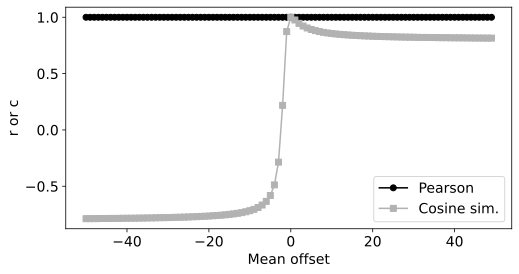

In [89]:
# create 2 variables
v1 = np.arange(4, dtype=float)
offsets = np.arange(-50,50)

# initialize the results and we will store the data here
results = np.zeros((len(offsets),2))

# create a simulation
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(v1,v1+offsets[i])

# print(results)

# line plot
plt.figure(figsize=(8,4))
h = plt.plot(offsets, results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_04_02.png', dpi=300)
plt.show()

# Exercise 3

There are several Python functions to compute the Pearson correlation coefficient. One of them is called `pearsonr` and is located in the `stats` module of the SciPy library. Open the source code for this file (hint: ??`functionname`) and make sure you understand how the Python implementation maps onto the formulas introduced in this chapter.

In [93]:
from scipy.stats import pearsonr

# ??pearsonr

# Exercise 4

Your goal in this exercise is to determine whether your own bare-bones correlation function is faster than NumPy’s `corrcoef` function. Modify the function from Exercise 4-2 to compute only the correlation coefficient. Then, in a for loop over 1,000 iterations, generate two variables of 500 random numbers and compute the correlation between them. Time the for loop. Then repeat but using `np.corrcoef`. In my tests, the custom function was about 33% faster than `np.corrcoef`. In these toy examples, the differences are measured in milliseconds, but if you are running billions of correlations with large datasets, those milliseconds really add up! (Note that writing your own functions without input checks has the risk of input errors that would be caught by `np.corrcoef`.) (Also note that the speed advantage breaks down for larger vectors. Try it!)

In [95]:
import time

def corr(x,y):
  # compute correlation (similar to above but mean-centered!)
  xm  = x-np.mean(x)
  ym  = y-np.mean(y)
  num = np.dot(xm,ym) # numerator
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
  cor = num / den

  return cor

# generate 2 variables
numIter = 1000
varLen = 500

start_time = time.time()
for i in range(numIter):
    x = np.random.randn(varLen,2)
    corr(x[:,0],x[:,1])
calc_Time1 = time.time() - start_time

start_time = time.time()
for i in range(numIter):
    x = np.random.randn(varLen,2)
    pearsonr(x[:,0],x[:,1])
calc_Time2 = time.time() - start_time

print(f'My Computation completed in {calc_Time1} seconds.')
print(f'Computation completed in {calc_Time2} seconds.')

My Computation completed in 0.09175491333007812 seconds.
Computation completed in 1.037090539932251 seconds.


# Filtering and Feature Detection Exercises

# Exercise 5

Let’s build an edge detector. The kernel for an edge detector is very simple: [−1 +1]. The dot product of that kernel with a snippet of a time series signal with constant value (e.g., [10 10]) is 0. But that dot product is large when the signal has a steep change (e.g., [1 10] would produce a dot product of 9). The signal we’ll work with is a plateau function. Graphs A and B in Figure 4-5 show the kernel and the signal. The first step in this exercise is to write code that creates these two time series.

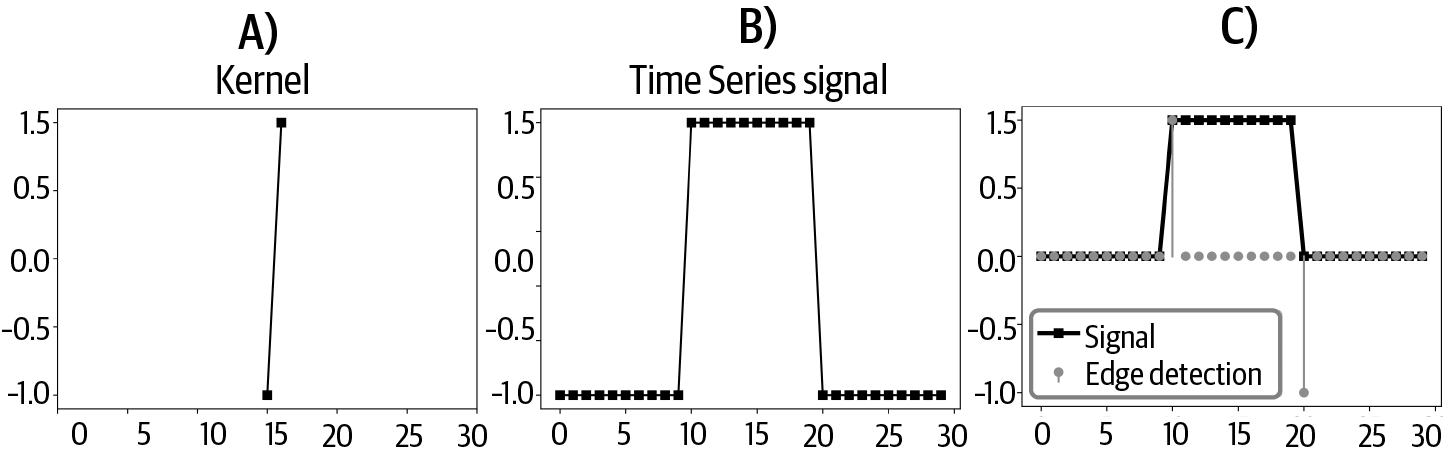

Next, write a for loop over the time points in the signal. At each time point, compute the dot product between the kernel and a segment of the time series data that has the same length as the kernel. You should produce a plot that looks like graph C in Figure 4-5. (Focus more on the result than on the aesthetics.) Notice that our edge detector returned 0 when the signal was flat, +1 when the signal jumped up, and −1 when the signal jumped down.

Feel free to continue exploring this code. For example, does change if you
pad the kernel with zeros ([0 −1 1 0])? What about if you flip the to be [1 −1]? How about if the kernel is asymmetric ([−1 2])?

In [ ]:
# Figure - A
# kernel
# a = np.array([16,1.5])
# b = np.array([15,-1.0])

# # draw points
# plt.plot(b[0],b[1],'ks',markerfacecolor='k',markersize=5)
# plt.plot(a[0],a[1],'ks',markerfacecolor='k',markersize=5)

# # draw line
# plt.plot([a[0],b[0]], [a[1],b[1]], 'k', linewidth=1.5)


# plt.xlim([0,30])
# plt.ylim([-1.25,1.75])
# plt.tight_layout()
# plt.show()

In [ ]:
# Figure - B
# y1 = -1.0
# y2 = 1.5
# a1 = np.arange(1,10,1,dtype=float)
# b2 = np.arange(10,20,1,dtype=float)
# c3 = np.arange(20,30,1,dtype=float)

# points = []

# # plot the points
# def plotPoints (range_pts, y_axis):
#     for x in range_pts:
#         plt.plot(x,y_axis,'ks')
#         points.append([x,y_axis])

# plotPoints(a1, y1)
# plotPoints(b2, y2)
# plotPoints(c3, y1)
# # print(points)

# # connect the points
# for p in range(len(points) -1):
#     x_coords = points[p]
#     y_coords = points[p + 1]
#     plt.plot([x_coords[0],y_coords[0]], [x_coords[1],y_coords[1]], 
#              'k', linewidth=1.5)
#     # print(x_coords, y_coords)

# plt.xlim([0,30])
# plt.ylim([-1.25,1.75])
# plt.tight_layout()
# plt.show()

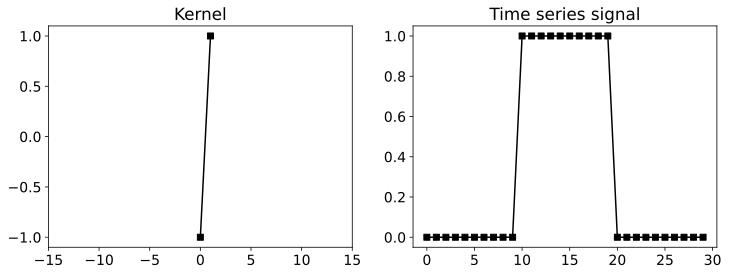

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [97]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([-1,1])

# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1

# plot them
_, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_04_04ab.png', dpi=300)
plt.show()

print(signal)

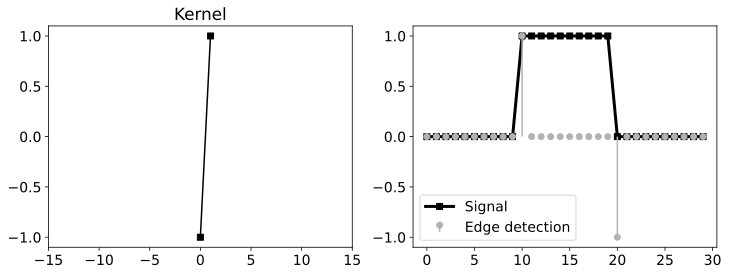

In [99]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

#loop over the signal do the template-matching(via dot products!)
for t in range(1,len(signal)-1):
    featureMap[t] = np.dot(kernel,signal[t-1:t+1])
    # print(signal[t-1:t+1])

# plot them
_, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers, stemlines,_=axs[1].stem(range(len(featureMap)),featureMap,
                                 basefmt=' ',linefmt='',markerfmt='o',
                                 label='Edge detection')

# set multiple properties at once "setp"
plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
plt.savefig('Figure_04_04c.png', dpi=300)
plt.show()

# print(featureMap)

# Exercise 6

Now we will repeat the same procedure but with a different signal and kernel. The goal will be to smooth a rugged time series. The time series will be 100 random numbers generated from a Gaussian distribution (also called a normal distribution). The kernel will be a bell-shaped function that approximates a Gaussian function, defined as the numbers [0, .1, .3, .8, 1, .8, .3, .1, 0] but scaled so that the sum over the kernel is 1. Your kernel should match graph A in Figure 4-6, although your signal won’t look exactly like graph B due to random numbers.

Copy and adapt the code from the previous exercise to compute the sliding time series of dot products—the signal filtered by the Gaussian kernel. Warning: be mindful of the indexing in the for loop. Graph C in Figure 4-6 shows an example result. You can see that the filtered signal is a smoothed version of the original signal. This is also called low-pass filtering.

Text(0.5, 1.0, 'B) Time series signal')

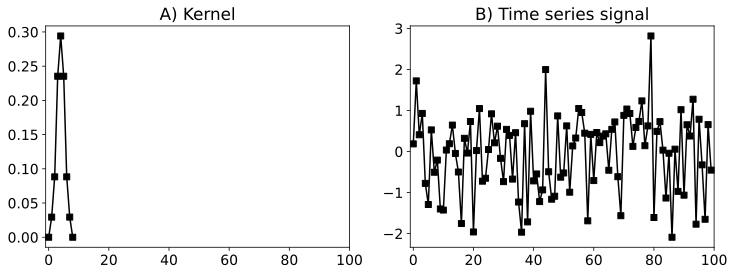

In [101]:
kernel1 = np.array([0, .1, .3, .8, 1, .8, .3, .1, 0])
kernel_sum = np.sum(kernel1)
normalized_kernel = kernel1 / kernel_sum

# Gaussian distribution
random_numbers = np.random.normal(loc=0, scale=1, size=100)
# print(random_numbers)

_, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(normalized_kernel,'ks-')
axs[0].set_xlim([-1,100])
axs[0].set_title('A) Kernel')

axs[1].plot(random_numbers,'ks-')
axs[1].set_xlim([-1,100])
axs[1].set_title('B) Time series signal')

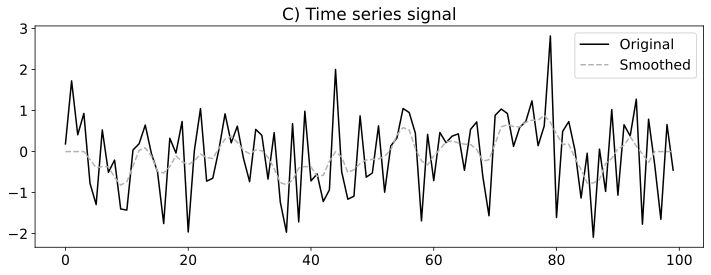

In [103]:
# initialize the feature map as zeros
featureMap1 = np.zeros(len(random_numbers))

kernel_size = len(normalized_kernel)

#loop over the signal, ensuring we have a window matching the kernel size
for t in range(kernel_size // 2, len(random_numbers) - kernel_size // 2):
    # Extract the slice of random numbers with the same size as the kernel
    window = random_numbers[t - kernel_size // 2:t + kernel_size // 2 + 1]
    featureMap1[t] = np.dot(normalized_kernel, window)

_, axs = plt.subplots(figsize=(12,4))
axs.plot(random_numbers,'-', color='black', label='Original')
axs.plot(featureMap1, '--', color=(.7,.7,.7), label='Smoothed')
axs.set_title('C) Time series signal')

plt.legend()
plt.show()

# Exercise 7

Replace the 1 in the center of the kernel with −1 and mean center the kernel. Then rerun the filtering and plotting code. What is the result? It actually accentuates the sharp features! In fact, this kernel is now a high-pass filter, meaning it dampens the smooth (low-frequency) features and highlights the rapidly changing (high-frequency) features.

Text(0.5, 1.0, 'B) Time series signal')

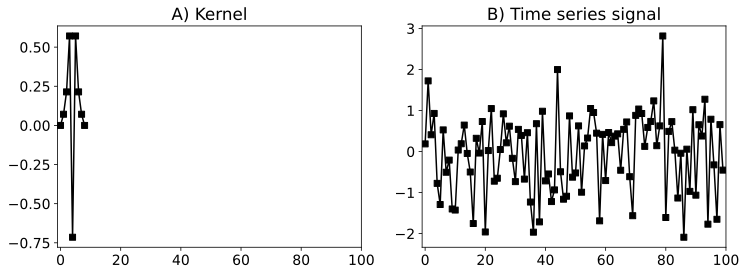

In [105]:
kernel2 = np.array([0, .1, .3, .8, -1, .8, .3, .1, 0])
kernel2_sum = np.sum(kernel2)
normalized2_kernel = kernel2 / kernel2_sum

# initialize the feature map as zeros
featureMap2 = np.zeros(len(random_numbers))

kernel2_size = len(normalized2_kernel)

_, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(normalized2_kernel,'ks-')
axs[0].set_xlim([-1,100])
axs[0].set_title('A) Kernel')

axs[1].plot(random_numbers,'ks-')
axs[1].set_xlim([-1,100])
axs[1].set_title('B) Time series signal')


In [ ]:
#loop over the signal, ensuring we have a window matching the kernel size
for t in range(kernel2_size // 2, len(random_numbers) - kernel2_size // 2):
    # Extract the slice of random numbers with the same size as the kernel
    window = random_numbers[t - kernel2_size // 2:t + kernel2_size // 2 + 1]
    featureMap2[t] = np.dot(normalized2_kernel, window)

_, axs = plt.subplots(figsize=(12,4))
axs.plot(random_numbers,'-', color='black', label='Original')
axs.plot(featureMap2, '--', color=(.7,.7,.7), label='Smoothed')
axs.set_title('C) Time series signal')

plt.legend()
plt.show()

# k-Means Exercises

# Exercise 8
One way to determine an optimal k is to repeat the clustering multiple times (each time using randomly initialized cluster centroids) and assess whether the final clustering is the same or different. Without generating new data, rerun the k-means code several times using k = 3 to see whether the resulting clusters are similar (this is a qualitative assessment based on visual inspection). Do the final cluster assignments generally seem similar even though the centroids are randomly selected?

data:
[[-0.5137394   3.32154362]
 [-0.14568629  1.0911872 ]
 [ 0.56584172  0.13676731]
 [-0.30584131  0.44990454]
 [ 2.74475757  0.31881984]
 [ 0.13782286  2.11251994]
 [-0.84518371  1.84520397]
 [ 1.28361976  1.88203262]
 [-0.02407456  2.21782663]
 [ 3.07102638  0.18578806]
 [ 1.38398899  0.282911  ]
 [ 2.35018916  1.36940142]
 [ 0.80774246 -0.09485632]
 [-0.55043849 -1.38349719]
 [-0.86849794  1.12155792]
 [ 1.33769795  2.84514006]
 [ 0.44235859  0.16700722]
 [ 0.90390844  1.62886144]
 [ 1.0461113   2.20261667]
 [ 0.38797634  1.45919439]
 [ 0.24090976  1.71421104]
 [ 0.93904165  1.59660814]
 [ 1.03762566  1.32993735]
 [ 0.74382848  0.83927075]
 [-1.1847119   0.61676245]
 [-0.24397068  1.34210809]
 [ 0.07040256  0.81832302]
 [ 0.16650492  1.26939317]
 [ 1.15301881  0.7774437 ]
 [ 1.40048044  1.85264254]
 [ 0.49894943  0.92083046]
 [ 1.98615933 -0.44469112]
 [ 0.01953713 -0.07028101]
 [ 0.75405516 -0.01901181]
 [-0.51001952  0.60224873]
 [ 1.80450945  0.36089771]
 [ 2.68316474  0.92834

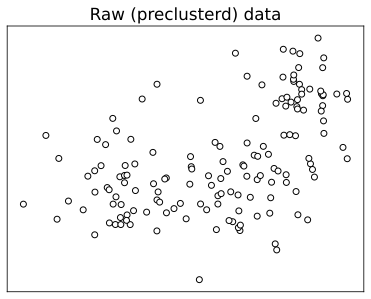

In [107]:
## Create data
nPerClust = 50

## blur around centroid
blur = 1

## XY centroid locations
A = (1, 1)
B = (-3, 1)
C = (3, 3)

## generate data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

## concatenate into a matrix
data = np.transpose(np.concatenate((a,b,c),axis=1))
print('data:')
print(data)

## plot the data
## data[row_start:row_end, column_number]
plt.plot(data[:,0], data[:,1], 'ko', markerfacecolor='w')
plt.title('Raw (preclusterd) data')
plt.xticks([])
plt.yticks([])

plt.show()

centroids:
[[-0.02407456  2.21782663]
 [ 2.35898469  1.1671674 ]
 [-4.92707878  0.67915934]]


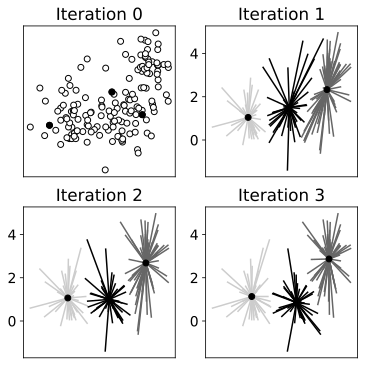

In [131]:
# Step 1: initialize k random clusters
k = 3
ridx = np.random.choice(range(len(data)), k, replace=False)
# print(ridx)
centroids = data[ridx,:]
print('centroids:')
print(centroids)

# set up the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [[0,0,0], [.4,.4,.4], [.8,.8,.8]]

# plot the data with initial random cluster centrods
axs[0].plot(data[:,0], data[:,1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:,0], centroids[:,1], 'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])

# for loop for Iteration 1-3
for i in range(3):
    # Step 1: compute the distance between each data observation and each cluster centroid
    dists = np.zeros((data.shape[0], k))
    for ci in range(k):
        dists[:,ci] = np.sum((data-centroids[ci,:])**2, axis=1)
        
    # Step 2: Assign each data to the group with min distance
    groupidx = np.argmin(dists, axis=1)
    
    # Step 3: Recompute the centroids as the mean of all data points within the class
    for ki in range(k):
        centroids[ki,:] = [np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1])]

    for iteri in range(len(data)):
        axs[i+1].plot([data[iteri,0], centroids[groupidx[iteri],0]],
                     [data[iteri,1], centroids[groupidx[iteri],1]], 
                      color=lineColors[groupidx[iteri]])
    axs[i+1].plot(centroids[:,0], centroids[:,1], 'ko')
    axs[i+1].set_title(f'Iteration {i+1}')
    axs[i+1].set_xticks([])
    axs[i+1].set_yticks

plt.savefig('Figure_04_03.png',dpi=300)
plt.show()

In [ ]:
print(len(random_numbers) - kernel_size // 2)

In [ ]:
print(kernel_size // 2)

In [ ]:
print(normalized_kernel.shape)

In [ ]:
# ??np.arange

In [ ]:
# ??plt.subplots